In [ ]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib as mpl
import plotly.express as px

# Определение критериев, влияющих на успешность видео игр.

Содержание.
0. [Введение.](#0)
1. [Знакомство с таблицей.](#1)
2. [Подготовка данных.](#2)
 1. [Названия игр.](#3)
 2. [Год выпуска.](#4)
 3. [Оценки критиков и игроков.](#5)
 4. [Рейтинг.](#6)
 5. [Расчет суммарных продаж.](#7)
3. [Анализ полученных данных.](#8)
 1. [Количество выпускаемых игр в год.](#9)
 2. [Продажи на платформы.](#10)
4. [Изучаем современные игры.](#11)
 1. [Успешность = продажы.](#12)
 2. [Платформа.](#13)
 3. [Жанр.](#14)
 4. [Рейтинг.](#15)
 5. [Оценки критиков и покупателей.](#16)
 6. [Вывод.](#17)
5. [Портрет покупателя разных регионов.](#18)
 1. [Популярные приставки.](#19)
 2. [Популярные жанры.](#20)
 3. [Возраст покупателей.](#21)
 4. [Вывод.](#22)
6. [Проверка гипотез.](#23)
 1. [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#24)
 2. [Средние пользовательские рейтинги жанров Action и Sports разные.](#25)
7. [Общий вывод.](#26)


## 0. Введение<a id="0"></a>

 В наших руках таблица с данными о продажах этих игр, и информация о самих этих играх. Наша задача навести в ней полный порядок, провести анализ какие критерии игр влияют на ее продажи и дать рекомендации своему работодателю на какие игры в первую очередь необходимо обратить внимание при создании ассортимента его магазина, для того что бы повысить продажи. Если проще изъясняться, то нам необходимо понять какие игры будут популярны у игроков в следующем году. Так же по ходу проекта нам необходимо проверить пару гипотез, а также определить, как отличаются покупатели в разных регионах. Все ясно - понятно, погнали!

## 1. Знакомство с таблицей.<a id="1"></a>

Открываем предоставленные данные.

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Практикум/Сборный проект 1/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


На лицо, еще даже без запроса информации, некоторые ошибки в данных, которые нам необходимо исправить: названия столбцов написаны с использованием верхнего регистра, есть нюансы с заполнением названий игр, которые могли привести к дубликатам, год выпуска явно не в том формате, ну и конечно же пропуски. Запросим информацию.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


После запроса информации о датасете стало очевидно, что всего в нем 16713 строк, то есть информация о 16713 играх. Так же присутствуют пропуски в данных, а сами данные сохранены в неправильных форматах:год выпуска игры в float64 и оценки игроков в object. Присутствуют пропуски в столбцах: название игры, год выпуска, жанр, оценка критиков, оценка игроков и рейтинг игры.

In [ ]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Самое маленькое количество пропусков в столбцах с названием игры и жанром, там их всего по два. В столбце с годом выпуска их уже больше – 269, на общем объеме данных, сумма не большая. В столбцах с оценками игроков и рейтингом дела обстоят на много хуже, в этих столбцах более 6700 пропусков. И совсем катастрофа с оценками критиков – они не проставлены у большей половины игр.

Проверим таблицу на наличеие дубликатов.

In [ ]:
data.duplicated().sum()

0

Дубликатов нет.

Продолжим знакомство с датасетом, через запросы уникальных значений в таблице. Начнем с названий игр.


In [ ]:
len(data['Name'].unique())

11560

А нашей таблице 16715 строк, и каждая стока посвящена отдельной игре, а вот названий игр, всего 11560, нестыковка. Есть догадка, что в таблице есть игры с одинаковым называнием, но выпущенные на разных платформах, эту теорию мы проверим в следующем разделе.

Посмотрим какие жанры присутствуют в данных.


In [ ]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Игры разделены на 12 жанров, и так же напоминаю, что в этом столбце присутствуют пропуски.

Рассмотрим названия платформ, на которых выходили игры.



In [ ]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

На первый взгляд с названиями платформ все ок. 

 Дойдя до столбца с годом выпуска игры будет не лишнем узнать, за какой период нам предоставлены игры.



In [ ]:
print('Год начала сбора данных: ', data['Year_of_Release'].min())
print('Год окончания сбора данных: ', data['Year_of_Release'].max())


Год начала сбора данных:  1980.0
Год окончания сбора данных:  2016.0


В таблице собраны данные об играх, выпущенных в течении 36 лет, с 1980 по 2016.

Взглянем на столбцы с оценками от критиков и игроков:

In [ ]:
data['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [ ]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Оценки критиков и игроков в разном формате, у игроков это от одного до десяти, включая десятичные значения, а у критиков - от одного до ста, только целыми числами. Это труднее для восприятия и для анализа, так что приведем все к "общему знаменателю". К тому же у игроков формат данных не верный. Еще у игроков в рейтинге есть значение 'tbd' - To Be Determined, значение рейтинга на момент взятия данных еще не выставлено, возможно свежая игра, но разберемся с этим в следующей главе.

Ознакомимся с рейтингами, которые были выставлены играм.

In [ ]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

С рейтингом тоже все понятно, формат тот, пропуски есть. А еще есть рейтинг RP, это игры, которые еще ожидают рейтинг, то есть нам придется взять на себя роль ESRB и выставить рейтинг до официального его представления.

**Вывод.**

В этом разделе мы выполнили первый взгляд на предоставленные данные, и обнаружили несколько проблем, с которыми нам следует разобраться для последующего анализа:

*   Неправильные форматы данных в столбцах с годом выпуска игры и оценкой игроков.
*   Присутствуют пропуски в большом количестве в рейтинге, оценке игроков и критиков.
*   Присутствуют игры с одинаковым названием.
*   Не всем играм были выставлены оценки игроков, и вместо этого стоит значение ‘tbd’.
*   Не всем играм выставлены оценки критиков, и вместо этого стоит значение ‘RP’.

Что бы продолжить работу, необходимо привести данные к правильному формату, удалить или заполнить пропуски в данных, для заполнения пропусков найти корреляционные связи.




## 2. Подготовка данных. <a id="2"></a>

Для удобства работы, приведем названия столбцов к нижнему регистру.



In [ ]:
data.columns = map(str.lower, data.columns)

###2.1 Названия игр.<a id="3"></a>

Напомню, что в этом столбце есть два пропуска и более пяти тысяч дубликатов. Если с пропусками все понятно, без названия игры, анализировать становится совершенно не ни интересно, да и заменить его будет нечем, то с дубликатами не все так просто: их почти треть от общего количества, что не дает нам возможность избавиться от них. Но есть догадка, что возможно это одни и те же игры, но вышедшие на разных приставках. Но начнем мы все-таки с игр "без названия".

Что бы вычислить нашу безликую игру, заменим пропуск на 0 и выведем на экран:

In [ ]:
data['name'] = data['name'].fillna(0)
data[data['name'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,0,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,0,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Предположу, что это одна и та же игра, просто "расшлёпанная" на две строки, продажи в Японии заслужили отдельного места в таблице, но данных по этой игре все равно мало: ни названия, ни жанра, ни оценок, ни рейтинга. Так что ее уже ничего не спасет, убираем ее из наших данных.

In [ ]:
data.drop(data[data.name == 0].index, inplace=True)

Мы избавились от сточек с пропуском, теперь давайте решим вопрос с дубликатами. Для подтверждения теории о том, что повторяющиеся данные, это одни и те же игры, но выпущенные на разных консолях, выведем самые часто повторяющиеся названия.

In [ ]:
data['name'].value_counts().head()

Need for Speed: Most Wanted    12
FIFA 14                         9
Madden NFL 07                   9
LEGO Marvel Super Heroes        9
Ratatouille                     9
Name: name, dtype: int64

Самой часто упоминаемой игрой оказалась “Need for Speed: Most Wanted”, выведем все ее упоминания.

In [ ]:
data[data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Теория подтверждается, это не дубликаты, это игры, вышедшие на разных платформах, так что удалить их, полностью бессмысленно. Обратил внимание на то, что в XBox есть два упоминания, но думаю, что это было переиздание легендарной "NFS". Проверим теорию еще на одной игре:

In [ ]:
data[data['name'] == 'Ratatouille']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1598,Ratatouille,DS,2007.0,Action,0.49,0.62,0.0,0.14,NaN,NaN,NaN
2442,Ratatouille,PS2,2007.0,Action,0.31,0.00,0.0,0.53,65.0,8,E
3069,Ratatouille,PSP,2007.0,Action,0.22,0.27,0.0,0.16,64.0,7.1,E
3902,Ratatouille,PS3,2007.0,Action,0.09,0.32,0.0,0.10,55.0,4.8,E
3948,Ratatouille,Wii,2007.0,Action,0.43,0.03,0.0,0.04,62.0,6.7,E
6398,Ratatouille,X360,2007.0,Action,0.23,0.02,0.0,0.02,56.0,tbd,E
7681,Ratatouille,GBA,2007.0,Action,0.14,0.05,0.0,0.00,65.0,tbd,E
9015,Ratatouille,GC,2007.0,Action,0.11,0.03,0.0,0.00,60.0,5.6,E
14514,Ratatouille,PC,2007.0,Action,0.01,0.01,0.0,0.00,NaN,7.9,E


Теория работает, продолжим очистку данных.

###2.2 Год выпуска.<a id="4"></a>

Визуализируем количество игр, выпускаемых каждый год, построим гистограмму. 

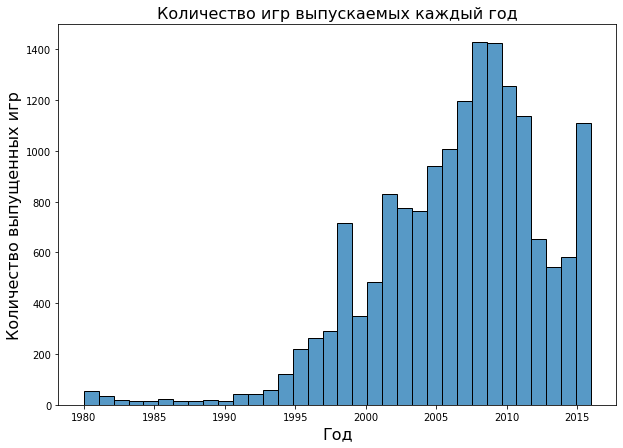

In [ ]:

plt.figure(figsize=(10,7))
plt.xlabel('Год', fontsize=16)
plt.ylabel('Количество выпущенных игр', fontsize=16)
plt.title('Количество игр выпускаемых каждый год', fontsize=16)
sns.histplot(data['year_of_release'], bins= 34)
plt.show()

По графику видно, что до 1994 года выпускалось мало игр, за то после, индустрия начала набирать обороты и достигла своего пика к концу 2000-х. За тем, пошел спад количества выпускаемых игр в год. Смею предположить, что это связано с финансовым кризисом 2008 года. И только в 2016 году компании оправились и возвращаются к утраченным оборотам.

Для того что бы заменить пропуски в годах, мало взять медиану всех значений, так как разброс по выходу игр очень большой. Привяжемся к платформе на которой вышла игра с пропуском, и заменим на середину производства этой платформы.

Для этого создадим таблицу с минимальными и максимальными значениями выпуска платформы, там же рассчитаем разницу этих показаний – это даст нам срок «жизни» платформы. Ну и в завершение рассчитаем середину, на которую будем опираться во время замены.

In [ ]:
df_life_of_platform = (data.groupby(['platform'])
                       .agg({'year_of_release': ['max', 'min']})                
                      )
df_life_of_platform['life'] = (
    df_life_of_platform['year_of_release', 'max'] - df_life_of_platform['year_of_release', 'min']
)
df_life_of_platform['mean'] = (
    (df_life_of_platform['year_of_release', 'max'] + df_life_of_platform['year_of_release', 'min'])/2
)
df_life_of_platform['mean'] = df_life_of_platform['mean'].astype('int')
df_life_of_platform.head()

year_of_release          life  mean
                     max     min            
platform                                    
2600              1989.0  1980.0   9.0  1984
3DO               1995.0  1994.0   1.0  1994
3DS               2016.0  2011.0   5.0  2013
DC                2008.0  1998.0  10.0  2003
DS                2013.0  1985.0  28.0  1999

Произведем замену пропущенных значений в основной таблице, на значения из новой.

In [ ]:
for platform in df_life_of_platform.index:
    data.loc[data['platform'] == platform, 'year_of_release'] = \
     data.loc[data['platform'] == platform, 'year_of_release']\
     .fillna(df_life_of_platform\
             .loc[platform, 'mean'].array[0])

Так как у нас в данных есть только год, то формат date нам не очень будет удобен, так что приведем год к формату целого числа, это не будет нас отвлекать лишними значениями, но и позволит нам проводить математические операции.

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('int')
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 2.2+ MB


Все чистенько! И смотрится красиво, и начинка правильная!)

###2.3 Оценки критиков и игроков.<a id="5"></a>

У нас большое количество пропусков в столбцах с оценками игроков и критиков, так как эти цифры ни от чего не зависят, заменять их на что то, это насыщать таблицу синтетическими данными, никак не отражающую реальную картину, что может нам только помешать. Так что оставим пропуски в этих столбцах как есть. Но по мимо них, у нас есть еще оценка TBD, которая говорит нам, что оценка пока не выставлена. Заменим ее на NaN.

In [ ]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.NaN

Проверим результат:

In [ ]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Теперь, когда мы избавились от буквенного значения, нам ничего не мешает привести столбец к цифровому формату.

In [ ]:
data['user_score'] = data['user_score'].astype('float')

Проверим коэффициент корреляции, между оценками критиков и игроков:

In [ ]:
data['user_score'].corr(data['critic_score'])

0.5808778320767237

Все таки критики и игроки оценивают игры по разному. Запишем этот плюс на сторону игроков. Построим матрицу корреляции для всей таблицы.

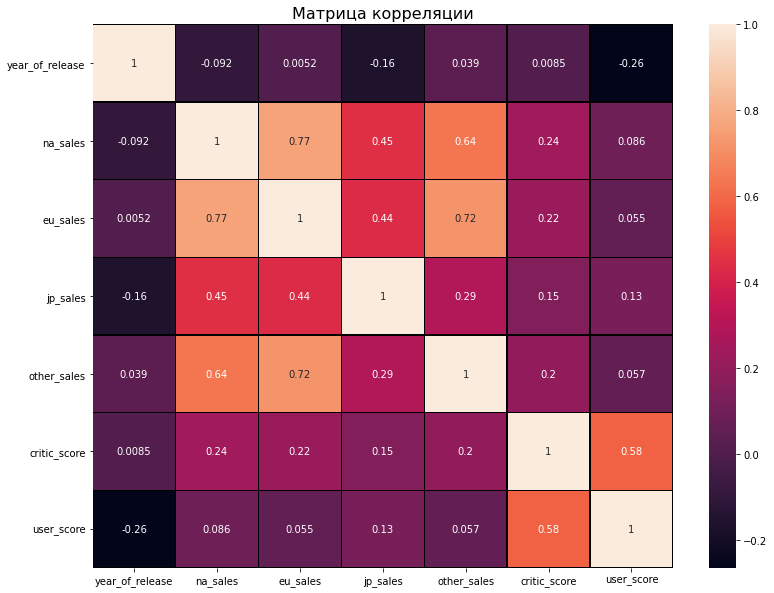

In [ ]:
plt.figure(figsize=(13, 10))
plt.title('Матрица корреляции',fontsize=16)
sns.heatmap(data.corr(), 
            annot= True, 
            fmt='.2g', 
            linewidths= 0.3,
            linecolor='black');

Оценки, выставляемые людьми и критиками ни с чем не коррелируют, немного между собой, но и то взаимосвязь не высокая. Поскольку оценка — это важный фактор, не будем вносить не настоящие данные, оставим как есть.

###2.3 Рейтинг.<a id="6"></a>

Еще раз вглянем на то из каких значений состоит столбец с заначениями рейтинга игр.

In [ ]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Предполагаю, что, исходя из жанра игры, мы можем предположить, что в ней происходит, следовательно, для какого возраста она предназначена.

Создадим вспомогательную таблицу, в которой мы посчитаем для каждого жанра сколько игр каждого рейтинга и достанем оттуда самый частый рейтинг:

In [ ]:
top_rating = (
    data
    .groupby(['genre', 'rating'], as_index = False)
    .agg({'name': 'count'})
    .sort_values(by = 'name', ascending = False)
    .groupby(['genre'])
    .agg({'rating' : 'first'})
    )
top_rating

,rating
genre,
Action,T
Adventure,E
Fighting,T
Misc,E
Platform,E
Puzzle,E
Racing,E
Role-Playing,T
Shooter,M


Избавимся от невнятного рейтинга RP, который так же считается еще не выставленным, заменим его на пропуск.

In [ ]:
data.loc[data['rating'] == 'RP', 'rating'] = np.NaN

Теперь избавимся от пропусков, заменив их на самый популярный рейтинг в том жанре, в которым находится игра.

In [ ]:
for genre in top_rating.index:
    data.loc[data['genre'] == genre, 'rating'] = \
    data[data['genre'] == genre]['rating']\
    .fillna(top_rating['rating'][genre])

Приведем оценки критиков и игроков в один стандарт для лучшего восприятия.

In [ ]:
data['user_score'] = data['user_score']*10

###2.4 Расчет суммарных продаж.<a id="7"></a>

Для того, чтобы видеть общую картину, нам необходимо рассчитать, сколько продалась игра суммарно во всех регионах. Добавим этот показатель в таблицу.

In [ ]:
data['all_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,31.38


**Вывод.**

В данном разделе, мы подготовили данные к дальнейшему анализу. Привели к единому стандарту названия столбцов, избавились от пропусков в столбцах с названиями игр, заполнили пропуски в годах выпуска, с привязкой к годам выпуска платформы, на которой данная игра выпускалась. Постарались опрделить от чего зависят оценки игроков и критиков – не от чего, так что пропуски в этих данных, оставили, избавившись от статусов “TBD” и  “RP”, что по сути, так же показывало, что оценка игроков и рейтинг еще не были определены.

## 3. Анализ полученных данных.<a id="8"></a>

###3.1 Количество выпускаемых игр в год.<a id="9"></a>

Как уже отмечалось ранее, индустрия производства игр развивается и не стоит на месте, рассмотрим динамику изменения количества выпущенных игр за изучаемый период. 

In [ ]:
df_game_year = data.groupby(['year_of_release'], as_index = False).agg({'name': 'count'})

In [ ]:
df_game_year.head()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,31


Отлично, теперь по полученным данным построим график:

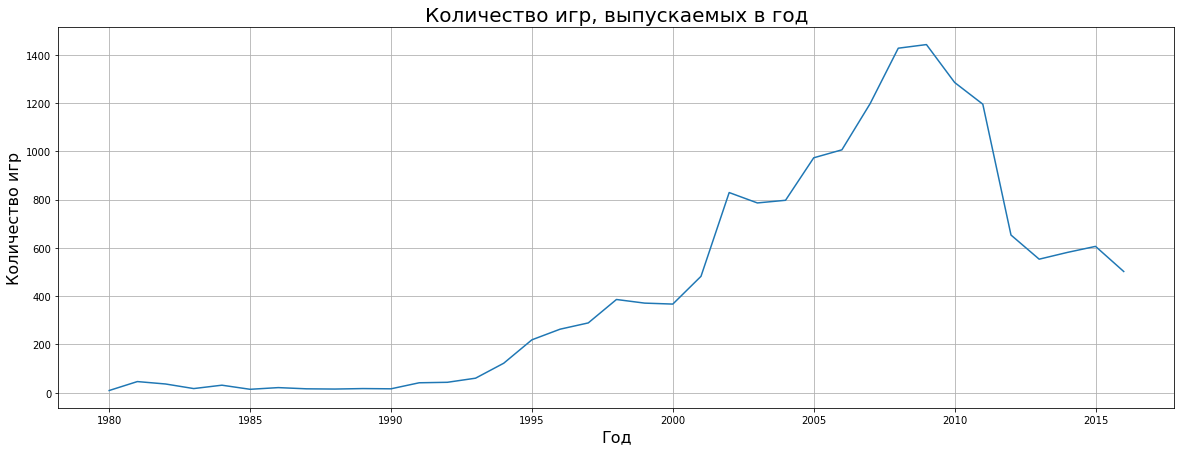

In [ ]:
plt.figure(figsize=(20, 7))
plt.title('Количество игр, выпускаемых в год', fontsize=20)
plt.xlabel('Год', fontsize = 16)
plt.ylabel('Количество игр', fontsize = 16)
plt.grid(True)
sns.lineplot(data= (data
                    .groupby(['year_of_release'],
                             as_index = False)
                    .agg({'name': 'count'})
), x='year_of_release', y='name');

Вот теперь все стало более наглядно! До 1993 года количество игр не росло, потом начался постепенной рост. И с приходом нового века в двухтысячном году произошёл взрывной рост, который длился до 2007 года. Так же стал очевиден кризис, который длится до сих пор.

Так же стало ясно, что рассматривать все года не нужно, так как за весь этот период игры кардинально изменились и ставить в один ряд Братьев Марио 1985 года выпуска с ГТА 5, мягко говоря не корректно. 

Для прогнозирования успешных игр нам необходимо учитывать то, на каких приставках они выходят. Для определения периода, который следует более пристально изучать, нужно рассмотреть то, сколько приставки остаются актуальными после выхода на рынок.

Для этого обратимся к уже созданной таблице df_life_of_platform, в ней мы выводили год выпуска первой игры для каждой платформы, год выпуска последней и разницу между этими датами, что является по сути продолжительностью жизни платформы. Вычислим медианную продолжительность актуальности платформы.


In [ ]:
df_life_of_platform['life'].median()

6.0

Шесть лет, в среднем за это срок приставки выходят на рынок, добираются до своего пика и уходят с рынка. Так как нам необходимо рассмотреть актуальный период, примем его с 2013 года. Так мы избавимся от приставок, уже уходящих с рынка, но пролучим более-менее большую выборку.

In [ ]:
data_clean = data.query('year_of_release >= 2013').reset_index()

In [ ]:
len(data_clean)

2242



В нашем списке осталось 2242 игры, дальнейший анализ будем проводить над ними.

###3.2 Продажи на платформы.<a id="10"></a>

После того, как мы выбрали актуальный период, узнаем сколько осталось платформ в таблице.

In [ ]:
print('Актуальных платфоорм: ', len(data_clean['platform'].unique()))

Актуальных платфоорм:  11


Теперь, когда мы рассмотрели общее количество игр, давайте рассмотрим остаток более детально, на каких платформах, сколько игр продавалось:

In [ ]:
df_platform = (
    data_clean
    .groupby(['platform'], as_index = False)
    .agg({'name': 'nunique'})
    .sort_values(by = 'name', ascending = False)
)
df_platform

,platform,name
4,PS4,392
6,PSV,359
3,PS3,345
0,3DS,311
10,XOne,247
2,PC,189
9,X360,186
8,WiiU,115
5,PSP,67
7,Wii,23


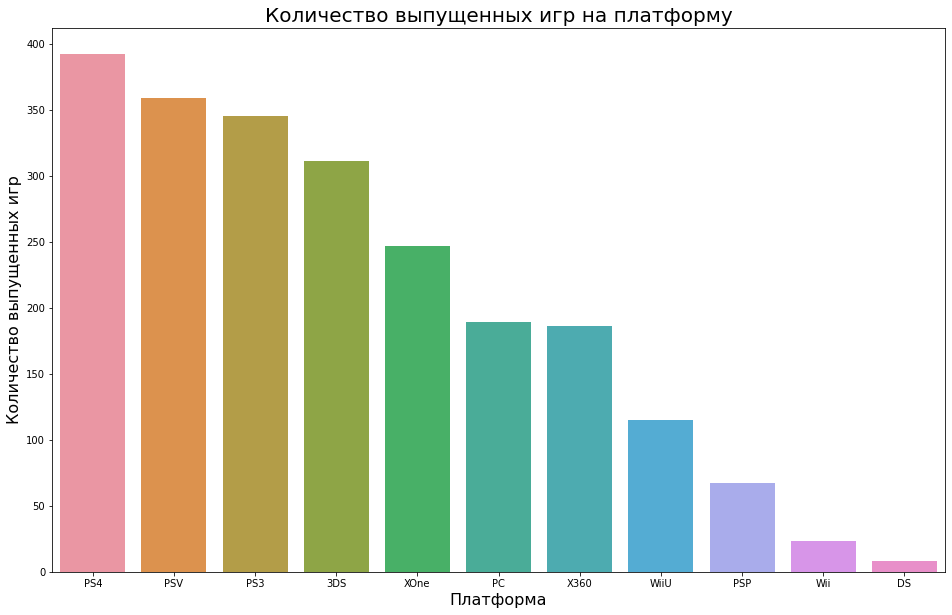

In [ ]:
plt.figure(figsize=(16, 10))
ax= sns.barplot(x = df_platform['platform'], y = df_platform['name'],)
plt.title('Количество выпущенных игр на платформу', fontsize=20)
plt.xlabel('Платформа', fontsize=16)
plt.ylabel('Количество выпущенных игр', fontsize=16)
plt.show()

Безоговорочным лидером по количеству релизов является Sony, она заняла первые три строчки. Четвертое заняла портативная Nintendo. Microsoft, с последней версией Xbox One, заняла пятое место по количеству выпущенных игр. До компьютеров добирается меньше половины игр, по сравнению с лидерами.

Теперь посмотрим, сколько копий было продано для каждой платформы:

In [ ]:
df_platform_sales = (
    data_clean
    .groupby(['platform'], as_index = False)
    .agg({'all_sales': 'sum'})
    .sort_values(by = 'all_sales', ascending = False)
)
df_platform_sales

,platform,all_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,144.44
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,33.25
7,Wii,13.66
5,PSP,3.50


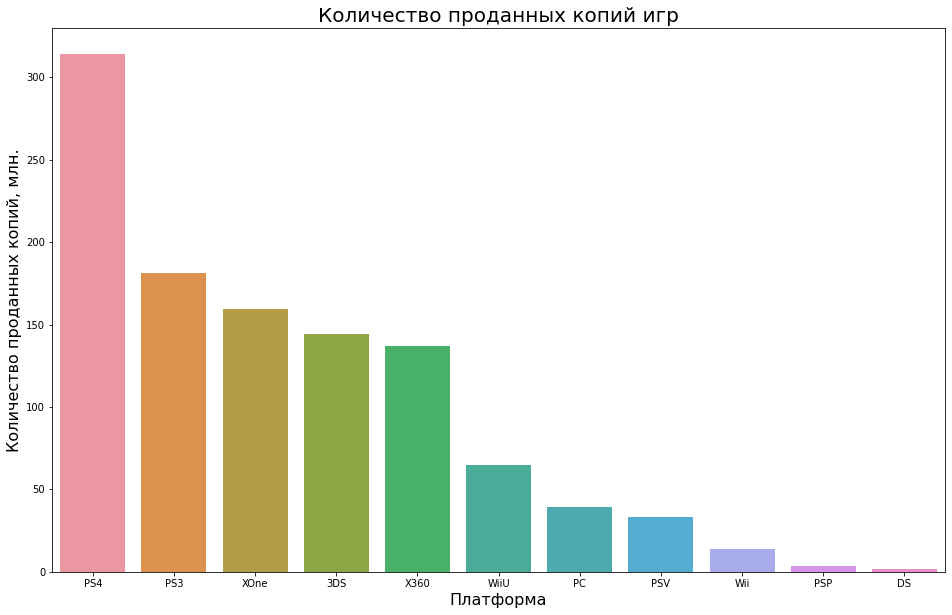

In [ ]:
plt.figure(figsize=(16, 10))
ax= sns.barplot(x = df_platform_sales['platform'],
                y = df_platform_sales['all_sales'],)
plt.title('Количество проданных копий игр', fontsize=20)
plt.xlabel('Платформа', fontsize=16)
plt.ylabel('Количество проданных копий, млн.', fontsize=16)
plt.show()

Среди платформ, лидером по проданным копиям игр, оказалась PS4, на нее было подано более 314 миллионов копий игр, что ставит ее не только на первое место, но и дает огромный отрыв от ближайшего конкурента PS3. За то в тройку лидеров вошел XboxOne, он с 3DS и Xbox360, имеют примерно одинаковые продажи. На примере Xbox можно судить, о том, что не смотря на более маленький ассортимент, игры на него продаются не плохо.



Теперь давайте рассмотрим, что происходило продажами у первой пятеркой по годам.  Создадим таблицу с группировкой по платформам и годам и выведем сумму проданных игр в эти года:

In [ ]:
df_platform_year = (
    data_clean
    .groupby(['platform', 'year_of_release'], as_index = False)
    .agg({'name': 'count'})
    .sort_values(by = 'name', ascending = False)
)


Возьмем топ семь платформ по продажам, мы их находили ранее, и названия платформ сохраним в список:

In [ ]:
list_platform = (df_platform_sales.head(7))['platform'].unique()
list_platform

array(['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC'], dtype=object)

и по этому списку сделаем срез из таблицы с продажами по годам:

In [ ]:
df_platform_year_top = df_platform_year.query('platform in@list_platform')

Скомпонуем таблицу и построим график для визуализации продаж игр.

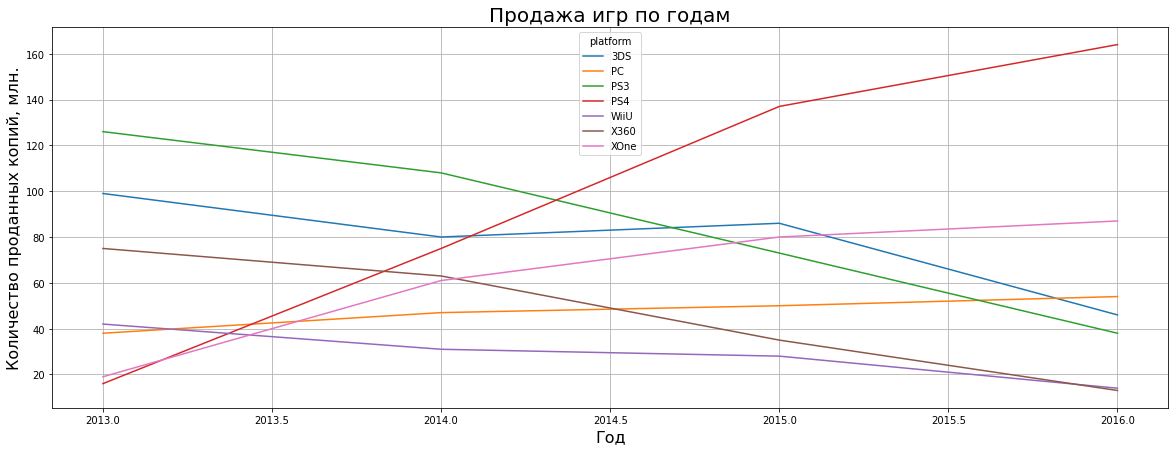

In [ ]:
plt.figure(figsize=(20, 7))
plt.title('Продажа игр по годам', fontsize=20)
plt.xlabel('Год', fontsize = 16)
plt.ylabel('Количество проданных копий, млн.', fontsize = 16)
plt.grid(True)
sns.lineplot(data= (df_platform_year_top
                    .pivot_table(index = 'year_of_release',
                                 columns = 'platform',
                                 aggfunc = 'sum'))['name']
             , dashes=False);



Из семи лидеров продаж за последние три года, только две платформы набирают обороты, это PS4 и XboxOne, предыдущие версии этих приставок уже уходят с рынка и игры на них перестают продаваться, так же как на Nintendo 3DS и WiiU.  А вот долгожитель нашей таблицы – ПК, ввиду отсутствия конкуренции набирает обороты, но не быстро.

## 4. Изучаем современные игры.<a id="11"></a>

Мы рассмотрели жизненный цикл платформ для игр, теперь познакомимся с самими играми. Напомню, что мы разделили все игры на две части: современные игры и игры прошлого поколения. Для себя мы решили, что смена поколений произошла в 2013 году. Давайте теперь узнаем какие характеристики присуще самым популярным современным играм.

__4.1 Успешность = продажы.__<a id="12"></a>

Взглянем на игры, которые продавались лучше всех в каждом году:

In [ ]:
df_game_top = (
    data_clean
    .groupby(['name', 'year_of_release'])
    .agg({'all_sales': 'sum'})
    .sort_values(by = 'all_sales', ascending = False)
    .reset_index()
)
df_game_top.head()

,name,year_of_release,all_sales
0,Grand Theft Auto V,2013,37.32
1,Call of Duty: Ghosts,2013,27.39
2,Call of Duty: Black Ops 3,2015,25.67
3,Call of Duty: Advanced Warfare,2014,21.97
4,Grand Theft Auto V,2014,18.09


Для определения успешности будем учитывать суммарные продажи во всех регионах, и как критерий успешности примем, то что продажи попали в четвертый квартиль.

In [ ]:
df_game_top['all_sales'].quantile(.75)

0.52

Четвертый квартиль начинается на 520 тысячах копий игры, следовательно, будем считать успешными игры, которые продавались большим тиражам.

Сделаем выборку, для дальнейшего изучения.

In [ ]:
df_game_top = df_game_top.query('all_sales >= 0.52')


В получившейся таблице мало данных, выдлим выборку из общей таблицы, но только по тем играм которые участвуют в получившейся таблице:

In [ ]:
list_game = df_game_top['name'].unique()
data_game_top = data_clean.query('name in@list_game')
del data_game_top['index']
data_game_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,T,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62


Теперь у нас есть таблица, в которой игры, выпущенные после 2013 года, и проданные тиражом свыше 520 тысяч экземпляров. Определение критериев популярности будем проводить по ней.

Для составления прогнозов на будущее мы можем проанализировать столбцы: с платформой на которой выходила игра, жанр и возрастной рейтинг. Начнем по порядку.

###4.2 Платформа.<a id="13"></a>

Посмотрим на каких платформах выходят самые популярные игры в акутальный периуд времени:

In [ ]:
data_game_top['platform'].value_counts().head(6)

PS4     169
XOne    154
PS3     151
X360    125
PC      108
3DS      68
Name: platform, dtype: int64

In [ ]:
data_game_top

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,T,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2073,NBA 2K17,PC,2016,Sports,0.00,0.01,0.00,0.00,90.0,63.0,E,0.01
2079,MLB 15: The Show,PSV,2015,Sports,0.01,0.00,0.00,0.00,NaN,88.0,E,0.01
2105,NHL 16,PS3,2015,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
2214,The Amazing Spider-Man 2 (2014),PC,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,T,0.01


In [ ]:
platform_top_sales=(
    data_game_top.groupby(['platform'])
    .agg({'all_sales': 'sum'})
    .sort_values(by = 'all_sales', ascending = False)
    .reset_index()
)

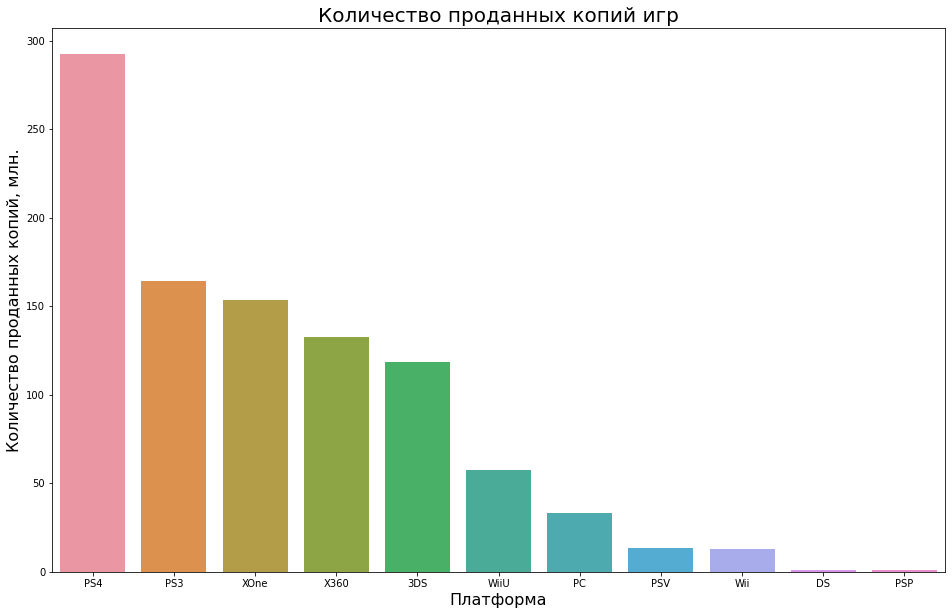

In [ ]:
plt.figure(figsize=(16, 10))
ax= sns.barplot(x =platform_top_sales['platform'],
                y = platform_top_sales['all_sales'])
plt.title('Количество проданных копий игр', fontsize=20)
plt.xlabel('Платформа', fontsize=16)
plt.ylabel('Количество проданных копий, млн.', fontsize=16)
plt.show()

Явный лидер по количеству продаж, опять является PS4, затем по убывающей: PS3, XOne, X360, 3DS. А дальше идет идёт сильная просадка по количеству проданных копий. Так что, примем эти пять платформ, как самые популярные на данный период времени.

Создадим список из названий этих платформ:



In [ ]:
list_platform_top = (platform_top_sales['platform'].head(5)).unique()
list_platform_top

array(['PS4', 'PS3', 'XOne', 'X360', '3DS'], dtype=object)

Построим диаграмму распределения продаж, для топовых платформ в глобальном периоде.

In [ ]:
# global_top_platform

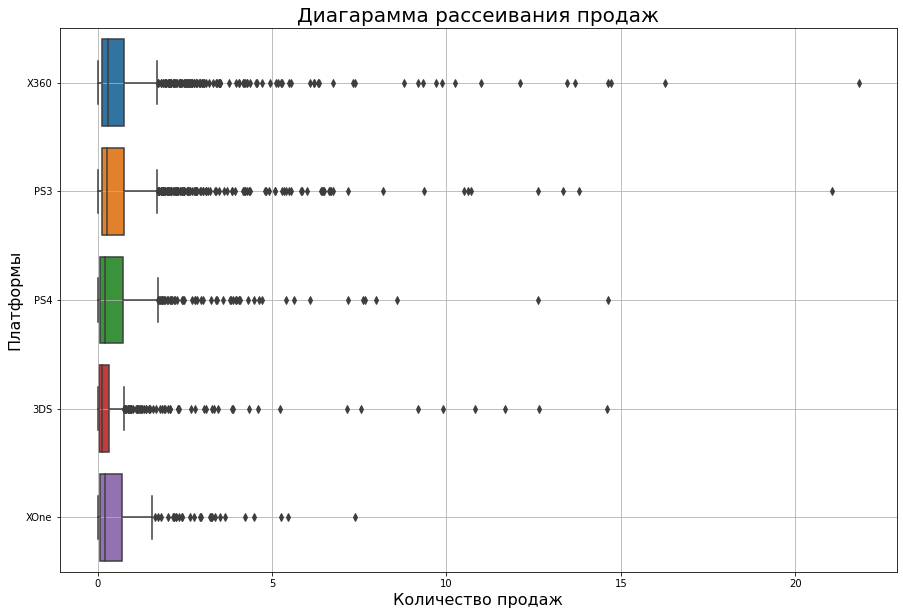

In [ ]:
global_top_platform=data.query('platform in@list_platform_top')
plt.figure(figsize=(15,10))
sns.boxplot(x='all_sales',
    y='platform',
    data=global_top_platform,
    )
plt.grid()
plt.title("Диагарамма рассеивания продаж",fontsize=20)
plt.xlabel('Количество продаж',fontsize=16)
plt.ylabel('Платформы',fontsize=16);

На диаграммах распределения продаж количества копий игр, видно, что присутствует большое количество выбросов, которые не дают визуально сравнить продажи по каждой платформе. Выставим диапазон, что бы лучше разглядеть. 

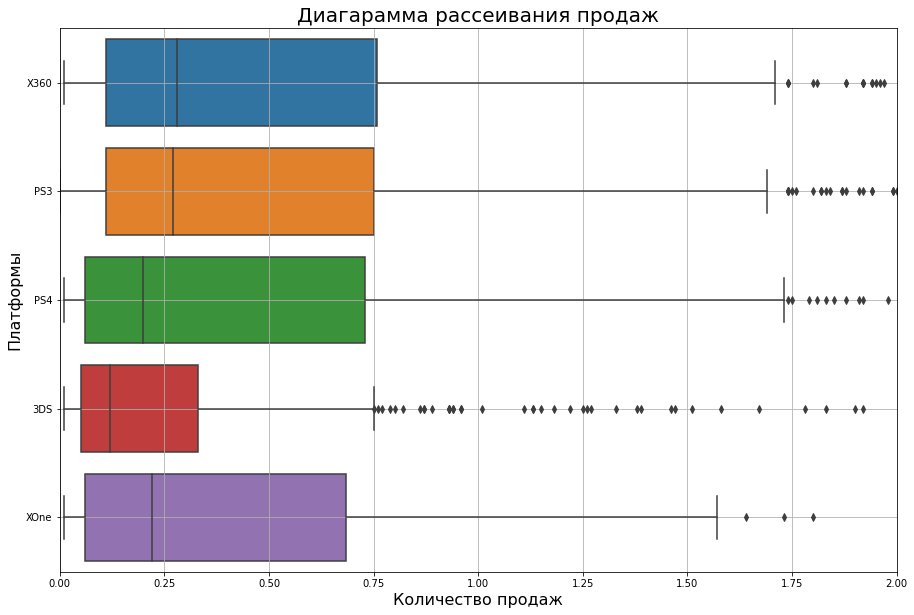

In [ ]:
global_top_platform=data.query('platform in@list_platform_top')
plt.figure(figsize=(15,10))
sns.boxplot(x='all_sales',
    y='platform',
    data=global_top_platform
    )
plt.xlim(0, 2)
plt.grid()
plt.title("Диагарамма рассеивания продаж",fontsize=20)
plt.xlabel('Количество продаж',fontsize=16)
plt.ylabel('Платформы',fontsize=16);

Теперь видно, что продажи на платформах X360 и PS3 практически одинаковые, совсем не много продажи на PS3 больше, медианы у этих платформ так же находятся очень близко. Но выбросы на Xbox заметно больше, чем у PS3. 

Дальше идет PS4, продажи игр на которую еще немного ниже, чем у PS3, за то медиана значительно снизилась, что говорит о том, что, возможно из-за широкого ассортимента, супер популярных игр стало меньше.

Такая же тенденция прослеживается и у XOne, правда медиана у нее выше чем к PS4. 

Что касается Nintendo 3DS, то продажи на нее значительно ниже чем у остальных, рассматриваемых, приставок.



Самое большое количество популярных игр выходило на PS2, но рекомендовать закупать игры для нее, то же самое, что накладывать камни в карманы тонущему. Рейтинг, который мы получили, безвозвратно устарел. вспомним, что мы определили жизненный цикл консоли в 5-7 лет. Так давайте рассмотрим последние 6 лет, и определим, чьё поризводство игр снижается, а чьё набирают обороты.

In [ ]:
data_game_top.pivot_table(index=['year_of_release'], 
                           columns='platform', 
                           values='name', 
                           aggfunc='count')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,25.0,4.0,26.0,67.0,14.0,5.0,19.0,7.0,24.0,54.0,14.0
2014,18.0,NaN,31.0,46.0,52.0,NaN,13.0,4.0,16.0,42.0,50.0
2015,15.0,NaN,25.0,26.0,59.0,NaN,6.0,2.0,11.0,21.0,52.0
2016,10.0,NaN,26.0,12.0,44.0,NaN,6.0,NaN,8.0,8.0,38.0


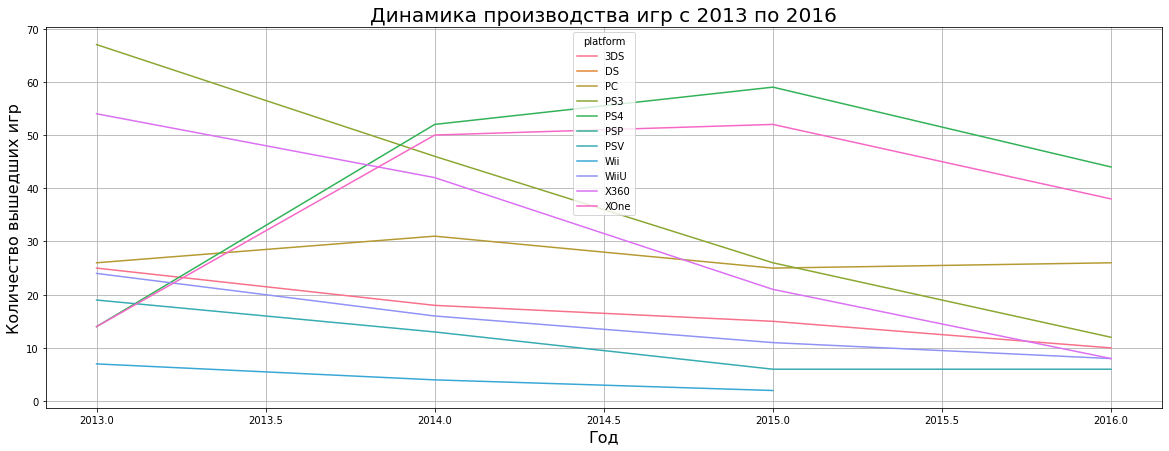

In [ ]:
plt.figure(figsize=(20, 7))
plt.title('Динамика производства игр с 2013 по 2016', fontsize=20)
plt.xlabel('Год', fontsize = 16)
plt.ylabel('Количество вышедших игр', fontsize = 16)
plt.grid(True)
sns.lineplot(data= (data_game_top.pivot_table(index=['year_of_release'], 
                           columns='platform', 
                           values='name', 
                           aggfunc='count')), dashes=False);

Судя по графику перспективными сейчас являются две платформы, это Play Station 4 и X-box One. Игры на них начали продавать три года назад и еще пару лет в продажах игр на эти консоли будет наблюдаться положительная динамика. Сейчас на графике в 2016 году виден спад, но данные за этот год не полные, так что обращать на это внимание не стоит. Так же стабильностью отличается ПК, и тут нужно понимать, что если другие консоли устаревают, то ПК всегда можно модернизировать, что бы он соответствовал своему времени.

###4.3 Жанр.<a id="14"></a>

Рассмотрим как изменялись ли предпочтения покупателей в предоставленных жанрах:

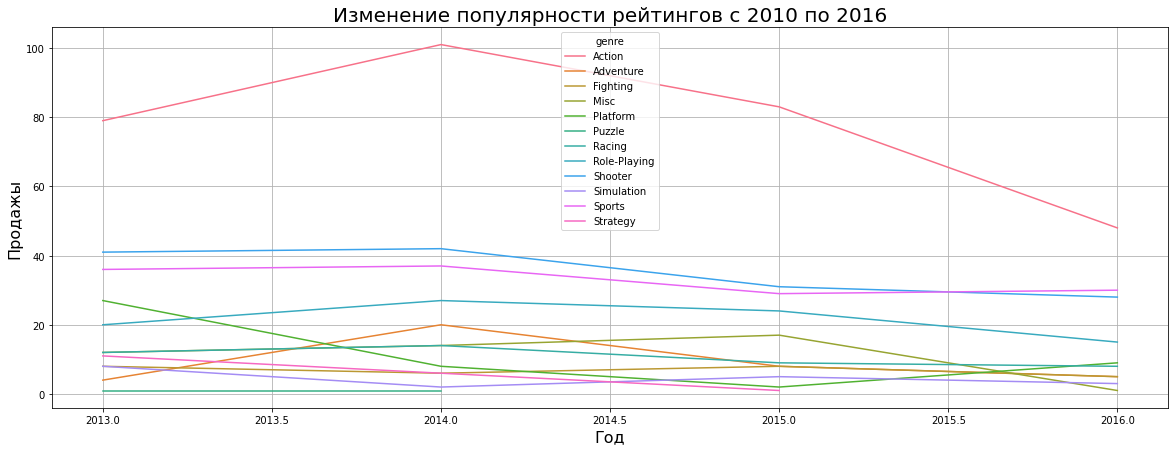

In [ ]:
plt.figure(figsize=(20, 7))
plt.title('Изменение популярности рейтингов с 2010 по 2016', fontsize=20)
plt.xlabel('Год', fontsize = 16)
plt.ylabel('Продажы', fontsize = 16)
plt.grid(True)
sns.lineplot(data= (data_game_top
                    .pivot_table(index=['year_of_release'],
                                 columns='genre', 
                                 values='name',
                                 aggfunc='count')), dashes=False);

Печальная статистика такие жанры как решение головоломки и стратегии нас покидают, к сожалению, для большинства игры это экшен, симуляция спорта ну или шутер, это три стабильно популярных жанра, игры в которых постоянно покупают.

###4.4 Рейтинг.<a id="15"></a>

Осталось разобраться с последним, предсказуемой характеристикой, игры с каким возрастным цензором имеют популярность:

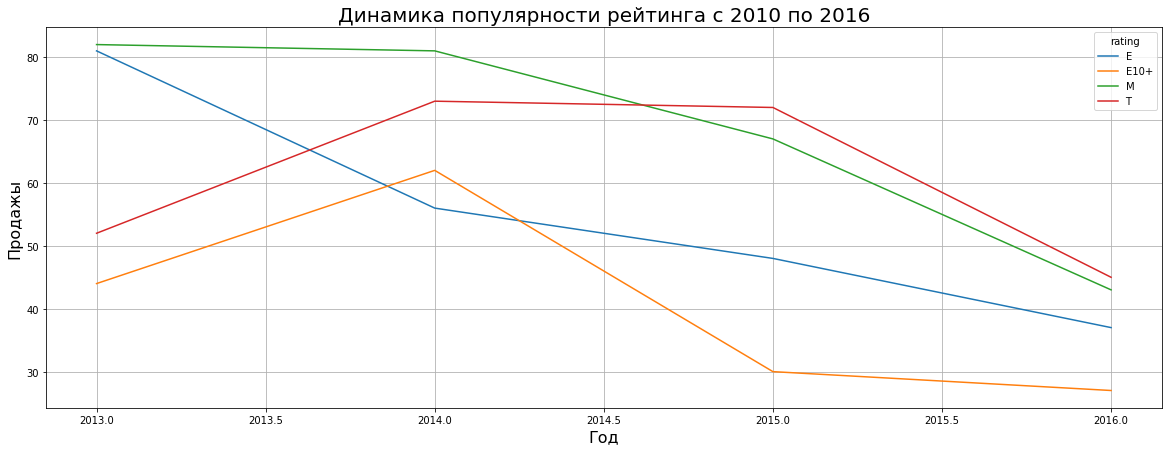

In [ ]:
plt.figure(figsize=(20, 7))
plt.title('Динамика популярности рейтинга с 2010 по 2016', fontsize=20)
plt.xlabel('Год', fontsize = 16)
plt.ylabel('Продажы', fontsize = 16)
plt.grid(True)
sns.lineplot(data=(data_game_top
                    .pivot_table(index=['year_of_release'],
                                 columns='rating',
                                 values='name',
                                 aggfunc='count')), dashes=False);



У нас на графике осталось всего четыре рейтинга. Лидирующие позиции занимают рейтинги «Т» и «М», то есть самый популярный рейтинг – «для подростков». «Для взрослых» находится на втором месте. Но в принципе, все четыре рейтинга присущи самым продаваемым играм, так что рекомендовать их можно все.

###4.6 Вывод.<a id="17"></a>

В этом разделе мы определили, что из тех факторов, которыми мы владели можно определить примерный портрет игры, которая будет популярна в следующим году. Это ирга для Play Station 4 или X-box One, но также не стоит списывать со счетов и ПК, предназначенная для подростков и или взрослых, в жанре Экшен, Шутер или Симуляция спорта. Именно такой ассортимент будет приносить максимальные продажи.

## 5. Портрет покупателя разных регионов.<a id="18"></a>

###5.1 Популярные приставки.<a id="19"></a>

Рассмотрим, есть ли различия между популярностью платформ, в разных регионах. Для этого посчитаем продажи игр для топовых платформ, для каждого региона. Соединим их в одну таблицу и построим графики.



In [ ]:
dist= { 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'}

na_platform = 0
eu_platform = 0
jp_platform = 0
other_platform = 0
for i in dist:
    df =(data_clean
        .groupby(['platform'])
        .agg({i: 'sum'})
        .sort_values(by = i, ascending = False)
        .head()
        )
    if i == 'na_sales':
        na_platform = df
    if i == 'eu_sales':
        eu_platform = df
    if i == 'jp_sales':
        jp_platform = df
    if i =='other_sales':
        other_platform = df
    
total_platform = (
    na_platform.merge(eu_platform, on = ['platform'], how = 'outer')
    .merge(jp_platform, on = ['platform'], how = 'outer')
    .merge(other_platform, on = ['platform'], how = 'outer')
).reset_index()
total_platform

,platform,na_sales,eu_sales,jp_sales,other_sales
0,PS4,108.74,141.09,15.96,48.35
1,XOne,93.12,51.59,NaN,14.27
2,X360,81.66,42.52,NaN,12.11
3,PS3,63.50,67.81,23.35,26.77
4,3DS,39.04,31.17,67.86,6.37
5,PSV,NaN,NaN,18.66,NaN
6,WiiU,NaN,NaN,10.88,NaN


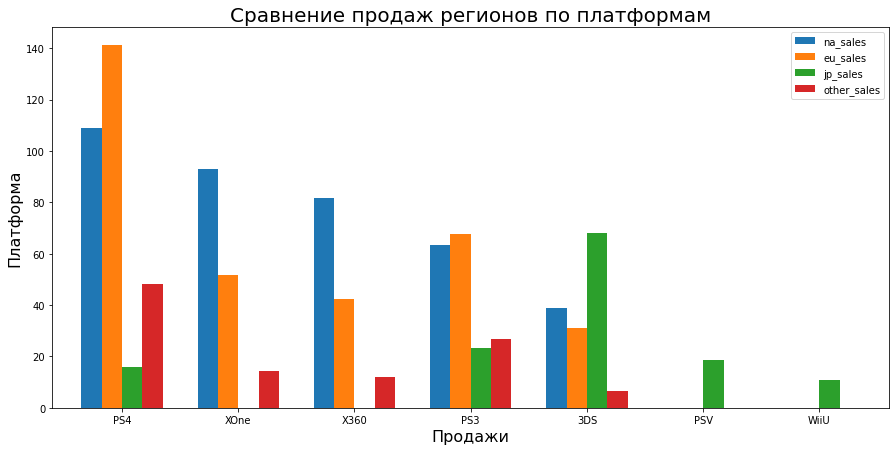

In [ ]:
total_platform.plot(kind = 'bar',
                    x='platform',
                    figsize=(15,7),
                    width=.7,
                    rot=0)
plt.xlabel('Продажи', fontsize=16)
plt.ylabel('Платформа', fontsize=16)
plt.title('Сравнение продаж регионов по платформам', fontsize=20);

Америка предпочла PS4, на второе место поставила XboxOne, далее Xbox360, PS3, Nintendo 3DS. Продажи распределились плавно, нет резких перепадов.

В Европе очень силно популярна PS4 игры на нее продвются больше чем в два раза чем у PS3, которое они поставили на второе место, оба поколения Xbox занял третье и четвертые места. И завершает пятерку 3DS.

Япония уникальный рынок, там на первое место по продажам игр заняла 3DS. Второе м третье места заняли PS3 и 4, соответствено. Xbox ни 360, ни One в рейтинг по продажам игр не вошли, вместо них они предпочди PSV и WiiU.

В остальных регионах ситуация идентичнка европейскому рынку.

###5.2 Популярные жанры.<a id="19"></a>

Отберем самые продоваемые жанры для каждого региона, объединим их и сравним.

In [ ]:
dist= { 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'}

na_gener = 0
eu_gener = 0
jp_gener = 0
other_gener = 0
for i in dist:
    df =(data_clean
        .groupby(['genre'])
        .agg({i: 'sum'})
        .sort_values(by = i, ascending = False)
        .head()
        )
    if i == 'na_sales':
        na_gener = df
    if i == 'eu_sales':
        eu_gener = df
    if i== 'jp_sales':
        jp_gener = df
    if i =='other_sales':
        other_gener = df
    
total_genre = (
    na_gener.merge(eu_gener, on = ['genre'], how = 'outer')
    .merge(jp_gener, on = ['genre'], how = 'outer')
    .merge(other_gener, on = ['genre'], how = 'outer')
).reset_index()
total_genre

,genre,na_sales,eu_sales,jp_sales,other_sales
0,Action,126.23,118.32,40.49,37.23
1,Shooter,109.78,87.88,6.61,28.78
2,Sports,65.27,60.52,NaN,19.45
3,Role-Playing,46.51,37.02,51.14,11.51
4,Misc,27.49,NaN,9.20,6.09
5,Racing,NaN,20.19,NaN,NaN
6,Fighting,NaN,NaN,7.65,NaN


Для визализации нарисуем графики покупок.

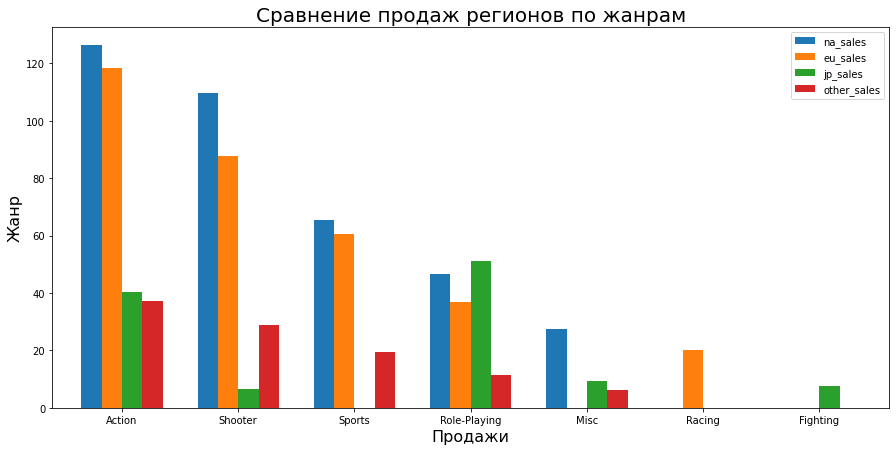

In [ ]:
total_genre.plot(kind = 'bar',
                 x='genre',
                 figsize=(15,7),
                 width=.7, 
                 rot=0)
plt.xlabel('Продажи', fontsize=16)
plt.ylabel('Жанр', fontsize=16)
plt.title('Сравнение продаж регионов по жанрам', fontsize=20);

Все регионы похожи, кроме Японии, ее рассмотрим отдельно. Для всех регионов - самый популярный жанр - Action, а Япония предпочла ролевые игры. С первого по четвертые места занимают: Action, Shooter, Sports и Role-Playing. И только Еврома отделилась от всех, поставив на пятое место симулятор гонок, вместо Misc.


В Японии бешанная популяность у ролевых игр и второго места по продажам - Экшена, остальные жанры не пользуются такой попульяностью. Продажи второго места в рейтинге больше в четыре раза, чем продажи третьего(Misk). Ни на одном другом рынке нет таких явных разрывов, между уровнями продаж. Япония  - единственный регион, в котором не продаются симуляторы спорта, там его заменили на симуляторы драк, которые они поставили на четверное место. И очень слабая потребность у японцев в Шутерах, которые они поставили на пятое место.


###5.3 Возраст покупателей.<a id="20"></a>

Сравним какие рейтинги больше всего продаются в разных регионах:

In [ ]:
dist= { 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'}

na_rating = 0
eu_rating = 0
jp_rating = 0
other_rating = 0
for i in dist:
    df =(data_clean
        .groupby(['rating'])
        .agg({i: 'sum'})
        .sort_values(by = i, ascending = False)
        .head()
        )
    if i == 'na_sales':
        na_rating = df
    if i == 'eu_sales':
        eu_rating = df
    if i== 'jp_sales':
        jp_rating = df
    if i =='other_sales':
        other_rating = df
    
total_rating = (
    na_rating.merge(eu_rating, on = ['rating'], how = 'outer')
    .merge(jp_rating, on = ['rating'], how = 'outer')
    .merge(other_rating, on = ['rating'], how = 'outer')
).reset_index()
total_rating

,rating,na_sales,eu_sales,jp_sales,other_sales
0,M,184.77,162.21,14.92,52.82
1,E,102.49,108.39,33.37,28.97
2,T,96.90,79.01,86.72,25.69
3,E10+,54.50,42.88,5.89,12.61


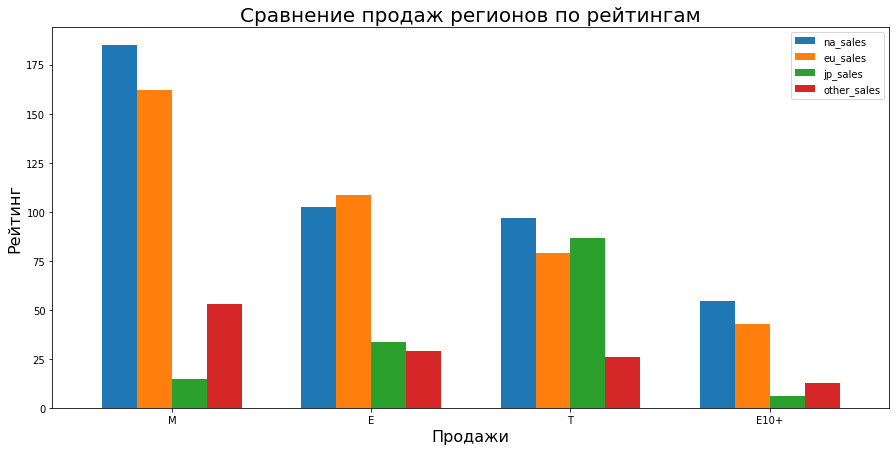

In [ ]:
total_rating.plot(kind = 'bar',
                  x='rating',
                  figsize=(15,7),
                  width=.7, 
                  rot=0)
plt.xlabel('Продажи', fontsize=16)
plt.ylabel('Рейтинг', fontsize=16)
plt.title('Сравнение продаж регионов по рейтингам', fontsize=20);

Хочу сразу отметить, что в акуальном периоде игры имеют всего четыре рейтинга: М, Т, Е и Е10+. В совокупности они охватывают все возрастные группы, так что рассмотрим, какие тенденции на рынках разных регионов.
По традиции японский рынок самый не обычный из всех. Лидером по продажам там являются игры с рейтингом Т, то есть игры для подростков, потом идут игры для детей, на третьем месте игры для взрослых, ну и замыкает рейтинг для детей от двесяти лет.
Во всем "остальном мире" дела с рейтингом обстоят так: самый продоваемый рейтинг - это игры для взрослых. На втором месте - игры для детей, на третьем для подростков и замыкают игры для детей от 10 лет.
Можно сделать вывод, что я Японии взрослый человек не играет в видео игры, в отличии от всех остальных регионов.

###5.4 Вывод.<a id="22"></a>

Давайте составим словесный портрет основного покупателя для каждого рынка. Начнем с Японии: глаза узкие, внешность азиатская рост не большой... шучу!)Но рынок Японии резко отличается от остальных, там совершенно не используют Xbox для игр, и даже самой попульяной PS предпочитают Nintendo 3DS, так же это единственный рынок, на котром в пятерку лидеров по продажам попала портатипная консоль, что говорит нам о том, что они много проводят времени в дороге. Так же они предпочитают роливые игры и Экшон, эти два жанра очень популярны, так что продажи других жанров резко падают относительно них. И в отличие от всех самы популярный рейтинг - Т, скорее всего это связанно не только с возрастом играющих людей, но и со спецификой жанров игр, которые имеют там популярность.

Партрет покупателя для остальных регионов давольно однотипный: взрослый человек или подросток, любящий Экшен, Шутер или симулятор спорта, играющий на PS4 или XBoxOne, европейцы не много отличаются от американцев и других рынков: 

В Европе тоже не любят XBox, за то PS4 там набрала очень большую популярность, продажи на предидущую врсию PS, обходят продажи и на Xbox360 и на XboxOne. А еще европейцы любят симуляторы гонок, которые ни на одном другом рынке не вошли в топ-5.

Американсикий рынок самый всеядный, на всех этапах сравнения никаких резких перепадов. Любимая приставка PS4, но XboxOne не сильно отстает, предыдущее поколение Xbox обогнало PS, по продажам игр. Планое снижение продаж так же налюдается и по жанрам игр и рейтингу.



## 6. Проверка гипотез.<a id="23"></a>

###6.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<a id="24"></a>

Для проверки этой гипотезы нам необходимо будет проверить на равенство две выборки, оценки игроков для XBoxOne и PC. Для начала составим нулевую и альтернативную гипотезы:

__Нулевая гипотеза будет звучать:__ *средняя оценка игр игроками для Xbox One ровна средней оценки игроками на PC.*

__Тогда альтернативная гипотеза будет гласить:__ *средняя оценка игр игроками для Xbox One не ровна средней оценки игроками на PC.*

Для проверки гипотезы, возьмем период существования XboxOne, напомню, что игры для него начали выходить в 2013 году. Так же нам необходимо избавиться от пропусков в оценках игроков.

In [ ]:
data_no_nan=data.query('user_score != "nan"').reset_index()
data_2013 = data_no_nan.query('year_of_release >= 2013').reset_index()


Подготовим выборку для ПК:

In [ ]:
pc_user_score = (
    (data_2013.query('platform == "PC"'))['user_score']
    .to_numpy()
)

Выборка для XboxOne:

In [ ]:
xbo_user_score = (
    (data_2013.query('platform == "XOne"'))['user_score']
    .to_numpy()
)

Сравним дисперсию наших выборок:

In [ ]:
np.var(xbo_user_score, ddof=1)

190.69968429360694

In [ ]:
np.var(pc_user_score, ddof=1)

303.5892752408881

Поскольку дисперсии различаются более чем на 5%, во время теста применим параметр equal_var = False.

Проведем ттест с критическим уровнем статистических ожиданий 5%

In [ ]:
results = st.ttest_ind(xbo_user_score, pc_user_score, equal_var = False)

results.pvalue

0.1475959401343053

Р-значения больше критичного уровня статистических ожиданий, следовательно, мы не можем отбросить нулевую гипотезу: средняя оценка игр игроками для Xbox One ровна средней оценки игроками на PC.

###6.2 Средние пользовательские рейтинги жанров Action и Sports разные.<a id="25"></a>

Для проверки этой гипотезы нам так же придется проверить на равность две выборки, зададим нулевую и альтернативную гипотезы:

__Нулевая гипотеза:__ *Средняя пользовательских рейтингов жанра Action ровна средней пользовательских рейтингов Sports.*

__Альтернативная гипотеза:__ *Средняя пользовательских рейтингов жанра Action не ровна средней пользовательских рейтингов Sports.*

Выблока для жанра "спорт":

In [ ]:
sports_user_score = (
    (data_no_nan.query('genre == "Sports"'))['user_score']
    .to_numpy()
)

Выборка для "экшена":

In [ ]:
action_user_score = (
    (data_no_nan.query('genre == "Action"'))['user_score']
    .to_numpy()
)


Проверка дисперсии для выборок:

In [ ]:
np.var(sports_user_score, ddof=1)

259.6514718973004

In [ ]:
np.var(action_user_score, ddof=1)

203.17468980332055

Разница между дисперсиями больше 5%.

Проведем ттест для не зависящих друг от друга выборкам с критическим уровнем статистических ожиданий в 5% и параметром equal=Falsh.

In [ ]:
results = st.ttest_ind(sports_user_score, action_user_score, equal_var = False)

results.pvalue

0.1148381879149927

P-value больше критического уровня статистического ожидания, мы не можем отвергнуть нулевую гипотезу, о том, что наши выборки равны. Следовательно основная гипотеза может быть отвергнута: *Средняя пользовательских рейтингов жанра Action ровна средней пользовательских рейтингов Sports.*

### 7. Общий вывод.<a id="26"></a>

Давайте подытожим результаты нашей работы. Главной задачей проекта было дать совет, какие игры будут хорошее продаваться в следующем году. Начнем с платформ: я бы рекомендовал поддерживать ассортимент для трех основных платформ: PlayStation4, XBoxOne и ПК. Первые две только наращивают обороты, то есть продажи игр с каждым годом растет, ну а ПК олицетворяет в этом мире хаоса -  стабильность, у него завоёванная аудитория, которая удерживает продажи на определенном уровне из года в год.

Теперь что касается самой игры. Вчерашние дети, уже не дети, так что на продажи игр с рейтингом "M" растут с каждым годом, все больше взрослых играют. Но и дети уже не дети, а подростки, так что рейтинг "Т" так же продается очень неплохо. Ну а что любят подростки и взрослые? правильно! Экшен, шутеры и виртуальный спорт) Эти три жанра были лидерами продаж в прошлом, так же будут и в будущем.

И так вангую: в следующем году будут популярны игры на PS4 и XboxOne в стиле экшен, шутер и спор, для подростков и взрослых.

Так же мы рассмотрели, чем отличаются рынки по миру. Главным отличием является любимая приставка для региона: PS для Европы, XBox - для Америки и Nintendo - для Японии. Япония так же резко отличается от всех остальных регионов, там любимые игры, это ролевые игры, а самый продаваемый рейтинг «Т». В остальных регионах картина довольно одинаковая, рейтинг «Е» всегда хорошо продавался, ну и конечно Экшен.

И под конец мы проверили две теории, и на основании этих проверок мы можем заявить, что оценки на ПК и на XBoxOne игроки ставят одинаковые, а средняя пользовательских рейтингов жанра экшен равен средней пользовательских рейтингов жанра спорт.

